In [1]:
import numpy as np
import pandas as pd
import xlwt
import datetime as dt
pd.options.mode.chained_assignment = None
import datetime
from datetime import date

#Read CSV
df =pd.read_csv(r"D:\Masterdata\Clean Data\data_all_2 August With Order Online.csv", sep = ';',converters = {'Phone' : str, 'Order #' : str, 'AWB' : str})

df['True datetime']=pd.to_datetime(df['True datetime'])
df['Real SKU']=df['Real SKU'].astype(str)
df['Phone']=df['Phone'].str.extract('(\d+)')

C:\Users\steven.nathanael\AppData\Local\Temp\ipykernel_12312\2224941245.py:10: DtypeWarning: Columns (12,15,20,24,25,27,29,30,31,32,33,34,35,36,37,39,53,54,57,59,60,66,67,73,74,80,81,87,88,94,95,101,102,108,122,123,134,135,136,153,159,161,167,168,169,172,173,174,175,176,180,181,183,196,197,198,199,200,201,202,203,205,209) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv(r"D:\Masterdata\Clean Data\data_all_2 August With Order Online.csv", sep = ';',converters = {'Phone' : str, 'Order #' : str, 'AWB' : str})


In [2]:
df['True datetime'].max()

Timestamp('2023-08-02 11:36:00')

In [6]:
for i in df.columns :
    print(i)

Order #
Sales Order ID
AWB
Paid Date
Order Status
Order date
Week
Date
Month
Quarter
Year
Channel
SKU
Brand
Product Name
Bundle Name
Price List NFI
Qty. Invoiced
Total Net
Sub Brand
Real SKU
Real Nama Produk
Parent Item
Parent SKU
Bundle Flag
Customer Email
Customer Name
Customer Group
Phone
Country
Region
City
Kecamatan
Kelurahan
Address
Zip Code
Shipping Name
Shipping Courier
Total
Coupon Code
Qty. Ordered
Qty. Shipped
Qty. Refunded
Item Price
Subtotal
Discounts
Tax
Total incl. Tax
Invoiced
Tax Invoiced
Invoiced incl. Tax
Refunded
Refunded incl. Tax
Cart Name Rule
Payment Channel
Voucher Amount
Discount Poin Reward
Ship Date
Discount Product
Produk 1
SKU Produk 1
PCS Produk 1
Price List NFI 1
Subtotal Produk 1
Harga Display 1
Harga Cost 1
Produk 2
SKU Produk 2
PCS Produk 2
Price List NFI 2
Subtotal Produk 2
Harga Display 2
Harga Cost 2
Produk 3
SKU Produk 3
PCS Produk 3
Price List NFI 3
Subtotal Produk 3
Harga Display 3
Harga Cost 3
Produk 4
SKU Produk 4
PCS Produk 4
Price List NFI 4

In [28]:
from datetime import date
osf=pd.read_excel(r"C:\Users\steven.nathanael\Documents\Python\Data\2. Master Data Git\data_supp\order filter.xlsx")

In [29]:
df1 = df[(df['Year'].isin([2023]))&(df['Order Status'].isin(osf['order filter'].unique()))]
df1.head()

,Order #,Sales Order ID,AWB,Paid Date,Order Status,Order date,Week,Date,Month,Quarter,...,Shipped Date,Note,Ready to Ship Date,Completed Date,Cancelled Reason,Item Note,Shipping Fee (Cashless),Picklist ID,Package ID,Shipment ID
0,12121413238,12170350531,BLI2209226577020,NaN,Sudah Settlement,02/01/2023 09:21,1.0,2.0,January,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12121409053,12170344246,BLI2209227755413,NaN,Sudah Settlement,02/01/2023 08:19,1.0,2.0,January,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12121396731,12170324721,BLIGI00049654681-1,NaN,Delivered,01/01/2023 23:38,52.0,1.0,January,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12121385758,12170309208,BLI1510222741567,NaN,Sudah Settlement,01/01/2023 19:53,52.0,1.0,January,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12121385635,12170309027,8811622233348591,NaN,Sudah Settlement,01/01/2023 19:51,52.0,1.0,January,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df[df['Brand'].isin(['L-Men']) & (df['Store'].isin(['Blibli'])) & df['Year'].isin([2023]) & df['Month'].isin(['July'])]['Order Status'].unique()

array(['Dalam pengiriman', 'Terkirim', 'Pengiriman Gagal', 'Baru',
       'Menunggu kurir', 'Order Batal'], dtype=object)

In [33]:
df2 = df1.groupby(['Year','Month','Store Type','Store','Channel','Brand','Sub Brand','Real SKU','Parent Item','Real Nama Produk','Bundle Name','Exported Parent Item'],dropna = False).agg({'Qty. Invoiced':'sum','Total Net Before PPN':'sum'}).reset_index()
df2 = df2[df2['Month'].isin(['May','June','July'])]


In [34]:
df2[df2['Bundle Name'].isnull() & (df2['Store'].isin(['Blibli']))]['Brand'].unique()

array(['Bundle', 'Gimmick', 'HiLo', 'NS', 'TS', 'WDANK', 'L-Men'],
      dtype=object)

In [35]:
with pd.ExcelWriter('Aggregat June July 2023.xlsx') as writer:
    df2.to_excel(writer)

In [7]:
df2.to_csv('Data 2022.csv', index = False)

RAW BUNDLE DATA

In [16]:
df5 = df4[df4['Year'] == 2022]

In [17]:
df5[df5['Real Brand'].isnull()]['Real SKU']

Series([], Name: Real SKU, dtype: object)

In [181]:
#BUNDLE TYPE PERFORMANCE
output1_1 = df5.groupby(['RTD','Brand','Real Brand','Real Sub Brand','Bundle Type','Real Nama Produk','Month','cust_type']).agg({'Unique Customer' : 'nunique',
                                                                                                        'Selling Price' : 'mean',
                                                                                                        'Qty. Invoiced' : 'sum',
                                                                                                        'Total Net Before PPN' : 'sum'}).reset_index()
output1_2 = df5.groupby(['RTD','Brand','Real Brand','Real Sub Brand','Bundle Type','Real Nama Produk','Month']).agg({'Selling Price' : 'mean',
                                                                                                             'Qty. Invoiced' : 'sum',
                                                                                                             'Total Net Before PPN' : 'sum'}).reset_index()
output1_3 = output1_1.pivot(values = 'Unique Customer', columns=['cust_type'], index = ['RTD','Brand','Real Brand','Real Sub Brand','Bundle Type','Real Nama Produk','Month']).fillna(0).reset_index()
output1 = pd.merge(output1_3,
                  output1_2,
                  on = ['RTD', 'Brand', 'Real Brand', 'Real Sub Brand', 'Bundle Type','Real Nama Produk', 'Month'],
                  how = 'inner')

In [182]:
#CUSTOMER TIME X BUNDLE
output2 = df5.groupby(['Unique Customer','cust_time','RTD', 'Real Brand','Real Sub Brand','Bundle Type','Real Nama Produk']).agg({'Selling Price' : 'mean',
                                                                                                                                  'Qty. Invoiced' : 'sum',
                                                                                                                                  'Total Net Before PPN' : 'sum'}).reset_index()

In [183]:
#AOV X BUNDLE
df6 = df5[(df5['Brand'] == 'Bundle') & (df5['Month'] != 8)]

Bundle_1 = pd.pivot_table(df5, values=['Total Net Before PPN','Sales Order ID'], columns=['Month'], aggfunc={'Total Net Before PPN':'sum', 'Sales Order ID':'nunique'}, fill_value=0).reset_index()
Bundle_2 = pd.pivot_table(df6, values=['Real Nama Produk'], columns=['Month'], aggfunc={'Real Nama Produk':'nunique'}, fill_value=0).reset_index()
Bundle = pd.concat([Bundle_1, Bundle_2], ignore_index =True).drop(columns = 8)
Bundle.set_index('index', inplace = True)
Bundle.loc['AOV'] = Bundle.loc['Total Net Before PPN'] / Bundle.loc['Sales Order ID']
Bundle

Month,1,2,3,4,5,6,7,9
index,,,,,,,,
Sales Order ID,2.779000e+03,2.319000e+03,2.473000e+03,2.631000e+03,2.358000e+03,2.188000e+03,3.625000e+03,2.800000e+01
Total Net Before PPN,5.521050e+08,3.929918e+08,3.934161e+08,3.813219e+08,4.210208e+08,3.633557e+08,6.284994e+08,3.456400e+06
Real Nama Produk,1.220000e+02,1.140000e+02,1.280000e+02,1.460000e+02,1.460000e+02,1.430000e+02,1.560000e+02,8.000000e+00
AOV,1.986704e+05,1.694661e+05,1.590846e+05,1.449342e+05,1.785499e+05,1.660675e+05,1.733792e+05,1.234429e+05


In [120]:
df5['Bundle Type'].unique()

array(['Single', 'Cross Rasa', 'Twin Pack', 'Triple Pack', '24 RTD',
       '4 Pack', '4 RTD', 'Multipack', 'Cross Brand'], dtype=object)

PART 2

In [11]:
df7 = df1[(df1['Store'] == "Blibli")&(df1['Year'].isin([2021,2022])) & (df1['Brand'].isin(['HiLo','L-Men','TS','NS','WDANK']))]
df7 = df7[(~df7['Real SKU'].str.startswith('('))&(~df7['Order Status'].str.contains('Pending|Cancel|Batal', case = False, na = False))]

#UNIQUE CUSTOMER
df7['Unique Customer'] = df7['Customer Name']+'_'+df7['Phone']
df7['Unique Customer'] = df7['Unique Customer'].fillna(df7['Customer Name'])

#DATE TO INTEGER
df7['Month'] = pd.to_datetime(df7['True datetime']).dt.strftime('%m').astype(int)
df7['Date'] = df7['Date'].astype(int)
df7['Year'] = df7['Year'].astype(int)

df7.head()

,Order #,Sales Order ID,Order Status,Order date,True datetime,Week,Date,Month,Year,Store,...,Real SKU,Product Name,Real Nama Produk,Bundle Name,Parent Item,Price List NFI,Selling Price,Qty. Invoiced,Total Net Before PPN,Unique Customer
3,12064084227,12089813514,Delivered,01/01/2021 00:07,2021-01-01 00:07:00,53,1,1,2021,Blibli,...,2306551173,L-Men Protein Bar Crunchy Chocolate 12 sachet ...,L-Men Protein Bar Chocolate 12 sch,NaN,L-Men Protein Bar Chocolate 12 sch,88000.0,118000.0,3.0,240000.0,Eoni MV_082
4,12064084275,12089813570,Delivered,01/01/2021 00:08,2021-01-01 00:08:00,53,1,1,2021,Blibli,...,2305551288,L-Men Platinum Choco Latte 800g (25g protein /...,L-Men Platinum Choco Latte 800gr (25gr protein),NaN,L-Men Platinum Choco Latte 800gr (25gr protein),275000.0,300000.0,1.0,250000.0,Eoni MV_082
8,12064084818,#SO-102671531,Delivered,2021-01-01 00:27:00,2021-01-01 00:27:00,53,1,1,2021,Blibli,...,2104390210,Tropicana Slim Kecap Manis,Tropicana Slim Kecap Manis 200ml,NaN,Tropicana Slim Kecap Manis 200ml,24750.0,25000.0,1.0,22500.0,Albert . _085325248804
9,12064084818,#SO-102671531,Delivered,2021-01-01 00:27:00,2021-01-01 00:27:00,53,1,1,2021,Blibli,...,2104031270,Tropicana Slim Leci Sirup,Tropicana Slim Sirup Leci 750ml,NaN,Tropicana Slim Sirup Leci 750ml,29700.0,26800.0,1.0,27000.0,Albert . _085325248804
13,12064084904,#SO-102671860,Delivered,2021-01-01 00:30:00,2021-01-01 00:30:00,53,1,1,2021,Blibli,...,2104390210,Tropicana Slim Kecap Manis,Tropicana Slim Kecap Manis 200ml,NaN,Tropicana Slim Kecap Manis 200ml,24750.0,25000.0,1.0,22500.0,Albert . _085325248804


In [12]:
NR2 = df7.drop_duplicates('Sales Order ID')[['Sales Order ID','Year','Month','Date','Unique Customer']].sort_values(by = ['Year', 'Month', 'Date'], ascending = True)
NR2['cust_time'] = NR2.groupby(['Unique Customer']).cumcount()
NR2['cust_type'] = NR2['cust_time'].apply(lambda x: 'New' if (x == 0) else 'Return')

df_NR2 = pd.merge(df7,
                 NR2[['Sales Order ID','cust_time','cust_type']], 
                 on ='Sales Order ID',
                 how = 'left')
df_NR2.drop(columns = ['Customer Name', 'Phone','Parent Item'], inplace = True)
df_NR2

,Order #,Sales Order ID,Order Status,Order date,True datetime,Week,Date,Month,Year,Store,...,Product Name,Real Nama Produk,Bundle Name,Price List NFI,Selling Price,Qty. Invoiced,Total Net Before PPN,Unique Customer,cust_time,cust_type
0,12064084227,12089813514,Delivered,01/01/2021 00:07,2021-01-01 00:07:00,53,1,1,2021,Blibli,...,L-Men Protein Bar Crunchy Chocolate 12 sachet ...,L-Men Protein Bar Chocolate 12 sch,NaN,88000.0,118000.000000,3.0,240000.0,Eoni MV_082,0,New
1,12064084275,12089813570,Delivered,01/01/2021 00:08,2021-01-01 00:08:00,53,1,1,2021,Blibli,...,L-Men Platinum Choco Latte 800g (25g protein /...,L-Men Platinum Choco Latte 800gr (25gr protein),NaN,275000.0,300000.000000,1.0,250000.0,Eoni MV_082,1,Return
2,12064084818,#SO-102671531,Delivered,2021-01-01 00:27:00,2021-01-01 00:27:00,53,1,1,2021,Blibli,...,Tropicana Slim Kecap Manis,Tropicana Slim Kecap Manis 200ml,NaN,24750.0,25000.000000,1.0,22500.0,Albert . _085325248804,0,New
3,12064084818,#SO-102671531,Delivered,2021-01-01 00:27:00,2021-01-01 00:27:00,53,1,1,2021,Blibli,...,Tropicana Slim Leci Sirup,Tropicana Slim Sirup Leci 750ml,NaN,29700.0,26800.000000,1.0,27000.0,Albert . _085325248804,0,New
4,12064084904,#SO-102671860,Delivered,2021-01-01 00:30:00,2021-01-01 00:30:00,53,1,1,2021,Blibli,...,Tropicana Slim Kecap Manis,Tropicana Slim Kecap Manis 200ml,NaN,24750.0,25000.000000,1.0,22500.0,Albert . _085325248804,1,Return
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83323,12110136474,#SO-125019697,"Delivered, Open",2022-08-30 22:30:00,2022-08-30 22:30:00,35,30,8,2022,Blibli,...,Tropicana Slim Hokkaido Cheese Cookies,Tropicana Slim Hokkaido Cheese Cookies,Paket Cookies Sehat Tropicana Slim - Nutty Cho...,22200.0,19500.000000,1.0,20000.0,theresia ._081808166829,0,New
83324,12110040213,#SO-124991805,Delivered,2022-08-29 22:09:00,2022-08-29 22:09:00,35,29,8,2022,Blibli,...,Tropicana Slim Mint Cocoa 4 Sachet,Tropicana Slim Mint Cocoa 4 Sachet,Paket Snack dan Kopi Tropicana Slim - Snack Be...,16650.0,14565.217391,1.0,15000.0,Wim ._087786381700,8,Return
83325,12109550180,#SO-124843718,Delivered,2022-08-24 18:16:00,2022-08-24 18:16:00,34,24,8,2022,Blibli,...,Tropicana Slim Korean Goguma Cookies (5 Sch),Tropicana Slim Korean Goguma Cookies (5 Sch),Mixed Package - Tropicana Slim Klepon Cookies ...,22200.0,20666.666667,2.0,40000.0,megahwati ._085814892166,0,New
83326,12109450440,#SO-124808335,Delivered,2022-08-23 10:46:00,2022-08-23 10:46:00,34,23,8,2022,Blibli,...,Tropicana Slim Korean Goguma Cookies (5 Sch),Tropicana Slim Korean Goguma Cookies (5 Sch),Mixed Package - Tropicana Slim Klepon Cookies ...,22200.0,20666.666667,1.0,20000.0,Yendi ._08111876715,0,New


In [14]:
df_NR3 = df_NR2
NR3 = df_NR3.groupby(['Year','Month','cust_type']).agg({'Unique Customer' : 'nunique'})
NR3

Unique Customer
Year Month cust_type                 
2021 1     New                   1663
           Return                 258
     2     New                   1220
           Return                 423
     3     New                   1790
           Return                 754
     4     New                   1149
           Return                 727
     5     New                   1169
           Return                 829
     6     New                   1011
           Return                 812
     7     New                   2018
           Return                1265
     8     New                   1029
           Return                1046
     9     New                    828
           Return                1058
     10    New                   1999
           Return                 722
     11    New                   1585
           Return                 729
     12    New                   1528
           Return                1008
2022 1     New                   1134
           Return                 967
     2     New                    973
           Return                 905
     3     New                   1126
           Return                 975
     4     New                   1148
           Return                1026
     5     New                    883
           Return                 999
     6     New                    760
           Return                 976
     7     New                   1415
           Return                1396
     8     New                   1216
           Return                1452
     9     New                     13
           Return                  15

In [33]:
bundle_SKU2 = df1[(df1['Brand']=='Bundle')]
bundle_SKU3 = bundle_SKU2.groupby(['Product Name','Real SKU', 'Real Nama Produk']).sum().reset_index()[['Product Name','Real SKU', 'Real Nama Produk']].rename(columns={'Product Name':'Bundle Name','Real SKU':'Bundle Name SKU', 'Real Nama Produk':'Real Bundle Name'})
bundle_SKU3

,Bundle Name,Bundle Name SKU,Real Bundle Name
0,Tropicana Slim Hokkaido Cheese Cookies 100 gr...,2104523105P3,Tropicana Slim Hokkaido Cheese Cookies 100gr (...
1,(ED 3 bulan) Twin Pack - Tropicana Slim Extra ...,(E)2104407P2,Near ED BUY 1 GET 1 Tropicana Slim Extra Virg...
2,(Free Gift) 3pcs L-Men Protein Crunch BBQ Beef...,(B)2309005305P3,(FREE) L-Men Protein Crunch BBQ Beef (20gr) x ...
3,(Free Gift) L-Men Protein Crunch Bbq Beef (3 pcs),(B)2309005305P3,(FREE) L-Men Protein Crunch BBQ Beef (20gr) x ...
4,(Near ED) BUY 1 GET 1 L-Men Gain Mass Mangga 5...,(E)2304034180P2,(Near ED) BUY 1 GET 1 L-Men Gain Mass Mangga 5...
...,...,...,...
3428,[Gift] Tropicana Slim Hokkaido Cheese Cookies ...,(B)(R)2104523105P5,(SAMPLING) Tropicana Slim Hokkaido Cheese Cook...
3429,[Gift] Tropicana Slim Sweetener Lemongrass Pan...,(B)2102526125P2,[Gift] Tropicana Slim Sweetener Lemongrass Pan...
3430,img L-Men Whey Advanced Cappuccino 250g x 2 pc...,2303054155P2,L-Men Advance Cappucino 250G x2 - Twinpack
3431,img Tropicana Slim Susu High Fiber Chocolate 5...,2151051180P2,Tropicana Slim High Fiber High Calcium Milk Ch...


In [34]:
df8 = pd.merge(df_NR2,
                bundle_SKU3,
                on = 'Bundle Name',
                how = 'left')
df8['Bundle Name SKU'] = df8['Bundle Name SKU'].fillna(df8['Real SKU'])
df8['Real Bundle Name'] = df8['Real Bundle Name'].fillna(df8['Real Nama Produk'])

In [96]:
#BUNDLE TYPE
bogof = ['Buy','Get']
bogof2 = ['BUY', 'GET']
bogof3 = ['Buy', 'get']
sku_nopromo = ['HiLo Chocolate Taro RTD 200ml x 4 pcs','Hilo RTD Thai Tea 200ml x 6 pcs', 'PAKET IMUN NUTRISARI WDANK','HiLo Chocolate Taro RTD 200ml x 6 pcs','Paket Kalsium Keluarga - HiLo School Chocolate 1000g & Active Es Teler 175g','Hilo RTD Milky Brown Sugar 200 ml x 6 pcs','NutriSari Mango Smoothie 200ml (4 pcs) - Ready to Drink', 'Hilo Coffee Milk Minuman Susu 2 Stick Packs (2 pcs)', ]
BP = ['U','B']
TL = ['T','L']
HL = ['H','L']
TH = ['T','H']
HNT = ['H','N','T']
HN = ['H','N']
TwinPack = ['PH64B63','PH62B60','PH63B61','PT52B65','PH64G61B63','PE25B73','PT56B74','PH70B84','PH72B85']
TwinPack2 = ['(2)','P2']
TriplePack = ['(3)','P3']
forPack = ['(4)','P4']
tuforRTD = ['(24)','P24']
Pack24 = ['PH39(12)B17(12)','PH39(12)U8(12)','PH39(16)B17(8)']
Pack4 = ['PH43(3)B24','PH39(3)B17']
Multipack = ['P20', 'P5', 'P12', 'P6', 'P10','P8','P15','PH39(5)B17','PL18(2)B55','PH48(5)B35']
df8['Bundle Type'] = df8['Bundle Name SKU'].apply(lambda x : 'Twin Pack' if any(a in x for a in TwinPack) else
                                                  ('24 RTD' if any(a in x for a in Pack24) else
                                                   ('4 Pack' if any(a in x for a in Pack4) else
                                                    ('Cross Brand' if all(a in x for a in TL) else
                                                     ('Cross Brand' if all(a in x for a in HL) else
                                                      ('Cross Brand' if all(a in x for a in HNT) else
                                                       ('Cross Brand' if all(a in x for a in TH) else
                                                        ('Cross Brand' if all(a in x for a in HN) else
                                                         ('Multipack' if any(g in x for g in Multipack) else
                                                          ('24 RTD' if any(a in x for a in tuforRTD) else
                                                           ('Triple Pack' if any(a in x for a in TriplePack) else
                                                            ('4 Pack' if any(a in x for a in forPack) else
                                                             ('Twin Pack' if any(a in x for a in TwinPack2) else
                                                              ('Single' if any(a in x for a in BP) else
                                                               ('Single' if 'G' in x else 
                                                                ('Cross Rasa' if 'P' in x else 'Single'))))))))))))))))

df8['Promo'] = df8.apply(lambda x: 'Gimmick' if 'G' in x['Bundle Name SKU'] else
                         ('BOGOF' if all(a in x['Real Bundle Name'] for a in bogof) else
                          ('BOGOF' if all(a in x['Real Bundle Name'] for a in bogof2) else
                           ('BOGOF' if all(a in x['Real Bundle Name'] for a in bogof3) else
                            ('No Promo') if any(a in x['Real Bundle Name'] for a in sku_nopromo) else
                             ('Bonus Produk' if any(a in x['Bundle Name SKU'] for a in BP) else 'No Promo')))), axis = 1)



array(['No Promo', 'Bonus Produk', 'Gimmick'], dtype=object)

In [97]:
RTD = ['2307061250', 'H31',
       '2101492', 'H32',
       '2101656', 'H33',
       '2101461', 'H34',
       '2101809250', 'H39',
       '1101182250', 'N35',
       '2101947250', 'H43',
       '1101155250', 'N34',
       '2101941250', 'H48',
       '2101907250', 'H49',
       '2106386249', 'T58',
       '21014281', 'H32']
Not_RTD = ['2101428180','2101428190']
df8['RTD'] = df8['Real SKU'].apply(lambda x : 'RTD' if any(a in x for a in RTD) else 'Not RTD')
df8['RTD'] = df8.apply(lambda x : 'Not RTD' if any(a in x['Real SKU'] for a in Not_RTD) else x['RTD'], axis = 1)

In [ ]:
#REDEFINE CROSS BRAND
df8['Brand'] = df8.apply(lambda x : 'Cross' if 'Cross Brand' in x['Bundle Type'] else x['Brand'], axis = 1)
df8['Sub Brand'] = df8.apply(lambda x : 'Cross' if 'Cross Brand' in x['Bundle Type'] else x['Sub Brand'], axis = 1)

#REDEFINE 4 PACK RTD
df8['Bundle Type'] = df8.apply(lambda x : '4 RTD' if ((x['RTD'] == "RTD") and ('4 Pack' in x['Bundle Type'])) else x['Bundle Type'], axis = 1)

In [37]:
df8[df8['RTD'] == "RTD"]['Real Nama Produk'].unique()

array(['HiLo School RTD Vanila Vegiberi 200ml',
       'L-Men Hi Protein 2 Go Chocolate',
       'HiLo Teen RTD Coffee Tiramisu 200ml',
       'HiLo Chocolate Taro RTD 200ml',
       'NutriSari RTD Mango Smoothie 200 ml', 'Hilo RTD Thai Tea 200ml',
       'Hilo RTD Milky Brown Sugar 200 ml',
       'HiLo RTD Kacang Hijau 200 ml', 'HiLo School RTD Coklat 200ml',
       'HiLo Teen RTD Coklat 200ml', 'NutriSari RTD Jeruk Madu 200 ml',
       'Tropicana Slim Oat Drink 190 ml (RTD)'], dtype=object)

In [101]:
df8['event'] = df8.apply(lambda x: 'DD' if x['Month'] == x['Date'] and x['Month'] != 1 else ('BPD' if x['Date'] >= 25 and x['Month'] != 4 and x['Month'] != 7 else 'No Event'), axis=1)

#DD
d8_DD1 = df8[df8['event'].isin(['DD', 'No Event'])]
d8_DD1 = d8_DD1[d8_DD1['Month'] != 1]
d8_DD2 = d8_DD1[d8_DD1['event']=='DD'][['Month','Date','event']]
d8_DD2.drop_duplicates(inplace = True)
d8_DD2['DD Date'] = d8_DD2['Date']
d8_DD2['DD After'] = d8_DD2['Date']+4
df8_1 = pd.merge(df8,
                d8_DD2[['Month','DD Date','DD After']], 
                on ='Month', 
                how ='left')

#RAMADHAN
d8_R1 = df8[df8['Month'] == 4]
d8_R1 = d8_R1[d8_R1['event'].isin(['No Event'])]
d8_R1['event'] = d8_R1.apply(lambda x: 'BPD' if x['Date'] >= 18 and x['Date'] <= 27 else 'No Event', axis=1)
d8_R2 = d8_R1[['Month','Date','event']]
d8_R2 = d8_R2[d8_R2['event']=='BPD'].drop_duplicates('Date')
d8_R2 = d8_R2.rename(columns = {'event' : 'Ramadhan'})
df8_2 = pd.merge(df8_1,
                 d8_R2[['Month','Date','Ramadhan']], 
                 on =['Month','Date'], 
                 how ='left')

#ANNIV
d8_A1 = df8[df8['Month'] == 7]
d8_A1 = d8_A1[d8_A1['event'].isin(['No Event'])]
d8_A1['event'] = d8_A1.apply(lambda x: 'BPD' if x['Date'] >= 20 and x['Date'] <= 27 else 'No Event', axis=1)
d8_A2 = d8_A1[['Month','Date','event']]
d8_A2 = d8_A2[d8_A2['event']=='BPD'].drop_duplicates('Date')
d8_A2 = d8_A2.rename(columns = {'event' : 'Anniv'})
df9 = pd.merge(df8_2,
                 d8_A2[['Month','Date','Anniv']], 
                 on =['Month','Date'], 
                 how ='left')


#APPLY ALL EVENT
df9['event'] = df9.apply(lambda x: 'DD' if x['Date'] >= x['DD Date'] and x['Date'] <= x['DD After'] else 
                            ('Mega' if x['Ramadhan'] == 'BPD' else
                             ('Mega' if x['Anniv'] == 'BPD' else 
                              ('BPD' if x['Date'] >= 25 and x['Date'] <= 30 and x['Month'] != 4 and x['Month'] != 7 else 'No Event'))), axis=1)

#CLEAN COLUMN
df10 = df9[df9['Year'] == 2022].drop(columns=['Order date','DD Date','DD After','Ramadhan','Anniv'])
df10

,Order #,Sales Order ID,Order Status,True datetime,Week,Date,Month,Year,Store,Region,...,Total Net Before PPN,Unique Customer,cust_time,cust_type,Bundle Name SKU,Real Bundle Name,Bundle Type,Promo,RTD,event
51864,12088976904,#SO-115810510,Delivered,2022-01-01 10:19:00,52,1,1,2022,Blibli,Jawa Tengah,...,99000.0,Artiyono ._085641181139,2,Return,2104115163P3,Triple Pack: Tropicana Slim Avocado Coffee (4 ...,Triple Pack,No Promo,Not RTD,No Event
51865,12088977159,#SO-115810612,Delivered,2022-01-01 10:22:00,52,1,1,2022,Blibli,Banten,...,86000.0,Anton Tisna_08119620301,1,Return,2103300125P2,Tropicana Slim Stevia Natural Sweetener 50s x2,Twin Pack,No Promo,Not RTD,No Event
51866,12088981310,#SO-115812743,Delivered,2022-01-01 11:28:00,52,1,1,2022,Blibli,Jawa Barat,...,35000.0,Regina Febria_081313322890,0,New,2102500125,Tropicana Slim Classic (50 sch),Single,No Promo,Not RTD,No Event
51867,12088981413,#SO-115812776,Delivered,2022-01-01 11:32:00,52,1,1,2022,Blibli,Banten,...,136800.0,tk susu my shop_0819690088,8,Return,2101656P24,HILO Teen Coffee Tiramisu Ready To Drink Susu ...,24 RTD,No Promo,RTD,No Event
51868,12088982302,#SO-115813291,Delivered,2022-01-01 11:45:00,52,1,1,2022,Blibli,Banten,...,65000.0,Ucok nasution_081383499009,1,Return,PH39U8,Buy 1 Get 1 - HiLo Chocolate Taro RTD 200ml (E...,Single,BOGOF,RTD,No Event
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85247,12110136474,#SO-125019697,"Delivered, Open",2022-08-30 22:30:00,35,30,8,2022,Blibli,Jawa Barat,...,20000.0,theresia ._081808166829,0,New,PT4T40T49,Paket Cookies Sehat Tropicana Slim - Nutty Cho...,Cross Rasa,No Promo,Not RTD,BPD
85248,12110040213,#SO-124991805,Delivered,2022-08-29 22:09:00,35,29,8,2022,Blibli,Jawa Barat,...,15000.0,Wim ._087786381700,8,Return,PT40T51T61T64,Paket Snack dan Kopi Tropicana Slim - Snack B...,Cross Rasa,No Promo,Not RTD,BPD
85249,12109550180,#SO-124843718,Delivered,2022-08-24 18:16:00,34,24,8,2022,Blibli,Banten,...,40000.0,megahwati ._085814892166,0,New,PT40T60T61,Paket Cookies 3 Rasa - Tropicana Slim Klepon C...,Cross Rasa,No Promo,Not RTD,No Event
85250,12109450440,#SO-124808335,Delivered,2022-08-23 10:46:00,34,23,8,2022,Blibli,Banten,...,20000.0,Yendi ._08111876715,0,New,PT40T60T61,Paket Cookies 3 Rasa - Tropicana Slim Klepon C...,Cross Rasa,No Promo,Not RTD,No Event


In [102]:
#TWIN PACK DATA
twin = df10[(df10['RTD'] == 'Not RTD') & (df10['Bundle Type'] == 'Twin Pack') & (df10['Promo'] != 'BOGOF')]
twin1 = twin.groupby(['Month','Real Nama Produk']).agg({'Qty. Invoiced' : 'sum'}).reset_index()
twin1['Qty'] = twin1['Qty. Invoiced'] / 2
twin1 = twin1.rename(columns = {'Qty' : 'Twin'})

#SINGLE PACK DATA
single = df10[(df10['RTD'] == 'Not RTD') & (df10['Bundle Type'] == 'Single')]
single1 = single.groupby(['Month','Real Nama Produk']).agg({'Qty. Invoiced' : 'sum'}).reset_index()
single1 = single1.rename(columns = {'Qty. Invoiced' : 'Single'})

singletwin = pd.merge(single1,
                      twin1[['Month','Real Nama Produk','Twin']],
                      on = ['Month','Real Nama Produk'],
                      how = 'inner')
singletwin1 = singletwin[(singletwin['Month'] > 3) & (singletwin['Month'] != 9)]
singletwin2 = singletwin1.groupby('Real Nama Produk').agg({'Single' : 'mean',
                                                           'Twin' : 'mean'}).reset_index()
singletwin2 = singletwin2.round(decimals = 0)
singletwin2
                                    

,Real Nama Produk,Single,Twin
0,HiLo Active Caramel Latte 500g,6.0,5.0
1,HiLo Active Vanilla 500gr,12.0,9.0
2,HiLo Almond Milk Coconut 200gr,5.0,11.0
3,HiLo Belgian Chocolate (10 sch),13.0,4.0
4,HiLo Es Pisang Ijo 10 Sch,8.0,5.0
...,...,...,...
68,Tropicana Slim Soy Latte - Kopi Susu Kacang Be...,20.0,24.0
69,Tropicana Slim Stevia (50 sch),40.0,18.0
70,Tropicana Slim Strawberry Jam 375gr,54.0,9.0
71,Tropicana Slim Sunflower Oil 946 ml,10.0,4.0


In [ ]:
singletwin1

In [ ]:
twin[twin['Real Nama Produk'] == 'HiLo Active Vanilla 500gr'][['Real Nama Produk', 'Qty. Invoiced']]

In [ ]:
with pd.ExcelWriter('blibli_Sep.xlsx') as writer:
    #dfpe2.to_excel(writer, sheet_name='pe')
    singletwin2.to_excel(writer, sheet_name='singletwin')
    df5.to_excel(writer, sheet_name='Raw')
    #dfnr1.to_excel(writer, sheet_name='new return overall')

In [188]:
df5.columns

Index(['Order #', 'Sales Order ID', 'Order Status', 'True datetime', 'Week',
       'Date', 'Month', 'Year', 'Store', 'Region', 'City', 'Brand', 'Real SKU',
       'Real Nama Produk', 'Price List NFI', 'Selling Price', 'Qty. Invoiced',
       'Total Net Before PPN', 'Unique Customer', 'Disc', 'cust_time',
       'cust_type', 'Bundle Type', 'Promo', 'Real Brand', 'Real Sub Brand',
       'RTD', 'event'],
      dtype='object')

In [ ]:
#CATEGORICAL

In [148]:
pivot2

Bundle Type,Month,Unique Customer,cust_type,24 RTD,4 Pack,4 RTD,Cross Brand,Cross Rasa,Multipack,Single,Triple Pack,Twin Pack
0,1,ACHMAD MAULANA_081287991675,New,0,0,0,0,0,0,0,0,1
1,1,AGUS ._085156648800,New,0,0,0,0,0,0,0,0,1
2,1,AGUS RUDIANTO_082,Return,0,0,0,0,0,0,1,0,0
3,1,AL ._087888288918,New,0,0,0,0,0,0,0,0,1
4,1,ALAMSAH ._081288996712,New,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,9,ria ._085895570038,New,0,0,0,0,0,0,1,0,0
17374,9,rini ._0818212990,Return,0,0,0,0,0,0,1,0,0
17375,9,santi ._089633972321,New,0,0,0,0,0,0,1,1,0
17376,9,tania ._081296146416,New,0,0,0,0,0,0,1,0,0


In [28]:
#PIVOTING
pivot1 = pd.pivot_table(df5, values='Sales Order ID', index=['Month', 'Unique Customer', 'cust_type'], columns=['Real Brand'], aggfunc='nunique', fill_value=0).reset_index()
pivot2 = pd.pivot_table(df5, values='Sales Order ID', index=['Month', 'Unique Customer', 'cust_type'], columns=['Bundle Type'], aggfunc='nunique', fill_value=0).reset_index()
pivot3 = pd.pivot_table(df5, values='Sales Order ID', index=['Month', 'Unique Customer', 'cust_type'], columns=['event'], aggfunc='nunique', fill_value=0).reset_index()
pivot4 = pd.pivot_table(df5, values='Sales Order ID', index=['Month', 'Unique Customer', 'cust_type'], columns=['Promo'], aggfunc='nunique', fill_value=0).reset_index()
pivot5 = pd.pivot_table(df5, values='Sales Order ID', index=['Month', 'Unique Customer', 'cust_type'], columns=['RTD'], aggfunc='nunique', fill_value=0).reset_index()
pivot6 = df5.groupby(['Month','Unique Customer','cust_type']).agg({'Sales Order ID' : 'nunique',
                                                                      'Qty. Invoiced' : 'sum',
                                                                      'Total Net Before PPN' : 'sum',
                                                                      'Real Nama Produk' : 'nunique',
                                                                      'Disc' : 'mean'}).reset_index()
#BRAND
pivot1['hilo'] = pivot1['HiLo'].apply(lambda x : 1 if x > 0 else 0)
pivot1['lmen'] = pivot1['L-Men'].apply(lambda x : 1 if x > 0 else 0)
pivot1['ts'] = pivot1['TS'].apply(lambda x : 1 if x > 0 else 0)
pivot1['ns'] = pivot1['NS'].apply(lambda x : 1 if x > 0 else 0)
pivot1['wdank'] = pivot1['WDANK'].apply(lambda x : 1 if x > 0 else 0)
pivot1['cross'] = pivot1['Cross'].apply(lambda x : 1 if x > 0 else 0)
pivot1 = pivot1.drop(columns = ['HiLo','L-Men','TS','NS','WDANK','Cross'])

#RTD
pivot5['rtd'] = pivot5['RTD'].apply(lambda x : 1 if x > 0 else 0)
pivot5['not_rtd'] = pivot5['Not RTD'].apply(lambda x : 1 if x > 0 else 0)
pivot5 = pivot5.drop(columns = ['RTD','Not RTD'])

#BUNDLE TYPE
pivot2['24rtd'] = pivot2['24 RTD'].apply(lambda x : 1 if x > 0 else 0)
pivot2['4rtd'] = pivot2['4 RTD'].apply(lambda x : 1 if x > 0 else 0)
pivot2['twin'] = pivot2['Twin Pack'].apply(lambda x : 1 if x > 0 else 0)
pivot2['triple'] = pivot2['Triple Pack'].apply(lambda x : 1 if x > 0 else 0)
pivot2['multipack'] = pivot2['Multipack'].apply(lambda x : 1 if x > 0 else 0)
pivot2['4pack'] = pivot2['4 Pack'].apply(lambda x : 1 if x > 0 else 0)
pivot2['cross_rasa'] = pivot2['Cross Rasa'].apply(lambda x : 1 if x > 0 else 0)
pivot2['cross_brand'] = pivot2['Cross Brand'].apply(lambda x : 1 if x > 0 else 0)
pivot2['single'] = pivot2['Single'].apply(lambda x : 1 if x > 0 else 0)
pivot2 = pivot2.drop(columns = ['24 RTD','Multipack','4 Pack','Single','Triple Pack','Twin Pack','Cross Rasa','4 RTD','Cross Brand'])

#EVENT
pivot3['bpd'] = pivot3['BPD'].apply(lambda x : 1 if x > 0 else 0)
pivot3['dd'] = pivot3['DD'].apply(lambda x : 1 if x > 0 else 0)
pivot3['mega'] = pivot3['Mega'].apply(lambda x : 1 if x > 0 else 0)
pivot3['no'] = pivot3['No Event'].apply(lambda x : 1 if x > 0 else 0)
pivot3 = pivot3.drop(columns = ['BPD','DD','Mega','No Event'])
                              
#PROMO
pivot4['sampling'] = pivot4['Bonus Produk'].apply(lambda x : 1 if x > 0 else 0)
pivot4['gimmick'] = pivot4['Gimmick'].apply(lambda x : 1 if x > 0 else 0)
pivot4['bogof'] = pivot4['BOGOF'].apply(lambda x : 1 if x > 0 else 0)
pivot4['normal'] = pivot4['No Promo'].apply(lambda x : 1 if x > 0 else 0)
pivot4 = pivot4.drop(columns = ['Bonus Produk','Gimmick','BOGOF','No Promo'])

#COMBINE PIVOT
pivot = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pivot6, pivot4, on = ['Month','Unique Customer','cust_type']),pivot5, on = ['Month','Unique Customer','cust_type']),pivot1, on = ['Month','Unique Customer','cust_type']),pivot2, on = ['Month','Unique Customer','cust_type']), pivot3,on = ['Month','Unique Customer','cust_type'])
                                                          

In [30]:
data_1 = pd.get_dummies(pivot, columns=['cust_type']).drop(columns = 'cust_type_Return')
data_1 = data_1[['Month', 'Unique Customer','cust_type_New', 'Sales Order ID', 'Qty. Invoiced',
       'Total Net Before PPN', 'Real Nama Produk', 'Disc','sampling', 'gimmick',
       'bogof', 'normal', 'rtd', 'not_rtd', 'cross', 'hilo', 'lmen', 'ts',
       'ns', 'wdank', '24rtd', '4rtd', 'twin', 'triple', 'multipack', '4pack',
       'cross_rasa', 'cross_brand', 'single', 'bpd', 'dd', 'mega', 'no']]

MODELLING (LOGISTIC REGRESSION)

In [21]:
#IMPORT MODULE FOR LOG REG
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import LogisticRegression as LogR
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as mp
import seaborn as sb

In [31]:
#VARIABLE X AND Y
x = data_1.iloc[:,3:]
y = data_1.iloc[:,2:3]

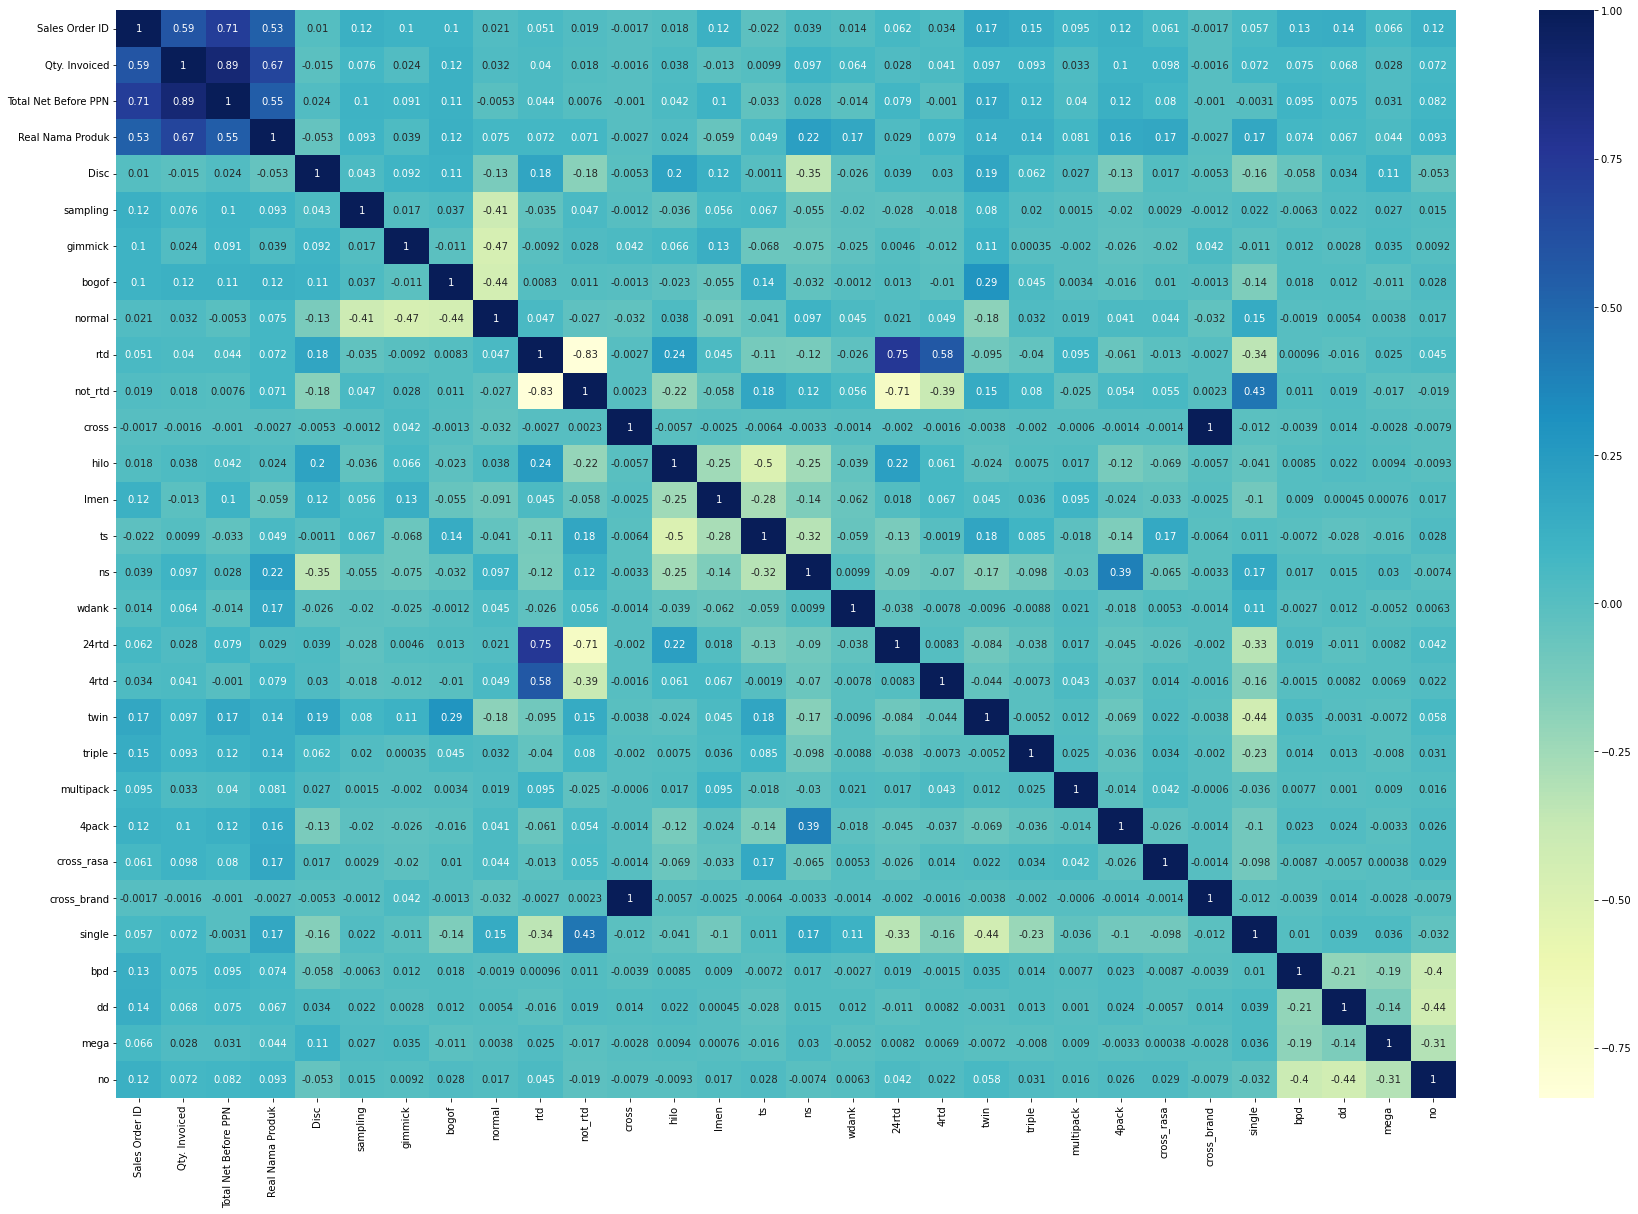

In [32]:
#CONFOUNDING PREDICTOR ANALYSIS
mp.figure(figsize = (30,20))
dataplot = sb.heatmap(x.corr(), cmap="YlGnBu", annot=True)

In [33]:
#TAKEOUT PREDICTED CONFOUNDING VARIABLE
X = x.drop(columns = ['Total Net Before PPN','cross_rasa','rtd','not_rtd'])

In [57]:
#SPLIT TRAIN TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)

In [58]:
#LOG REGRESSION
logmodel = LogR(max_iter = 1000)
result = logmodel.fit(X_train,y_train.values.ravel())

#MAKING PREDICITION BASED ON LOGR
pred = logmodel.predict(X_test)

In [59]:
#CONFUSION MATRIX
cnf_matrix = metrics.confusion_matrix(y_test, pred)
cnf_matrix

array([[1287, 1687],
       [ 511, 2598]], dtype=int64)

In [60]:
#BASIC ACCURACY TEST
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.43      0.54      2974
           1       0.61      0.84      0.70      3109

    accuracy                           0.64      6083
   macro avg       0.66      0.63      0.62      6083
weighted avg       0.66      0.64      0.62      6083



In [65]:
#P VALUE
x_train = sm.add_constant(X_train)
logit_model=sm.Logit(y_train,X_train,)
result=logit_model.fit()
print(result.summary())

         Current function value: inf
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          cust_type_New   No. Observations:                11295
Model:                          Logit   Df Residuals:                    11270
Method:                           MLE   Df Model:                           24
Date:                Wed, 07 Sep 2022   Pseudo R-squ.:                     inf
Time:                        17:07:31   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Sales Order ID     -23.7197   5944.363     -0.004      0.997   -1.17e+04    1.16e+04
Qty. Invoiced       -0.0869      0.012     -7.260   

C:\Users\steven.nathanael\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\steven.nathanael\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\steven.nathanael\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\steven.nathanael\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\steven.nathanael\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params av

MODELLING (DECISION TREE)

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [89]:
predictions = dtree.predict(X_test)
dtree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, random_state=40)
dtree.fit(X_train,y_train)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.40      0.51      2974
           1       0.60      0.86      0.71      3109

    accuracy                           0.63      6083
   macro avg       0.67      0.63      0.61      6083
weighted avg       0.66      0.63      0.61      6083



In [90]:
features = list(X.columns)

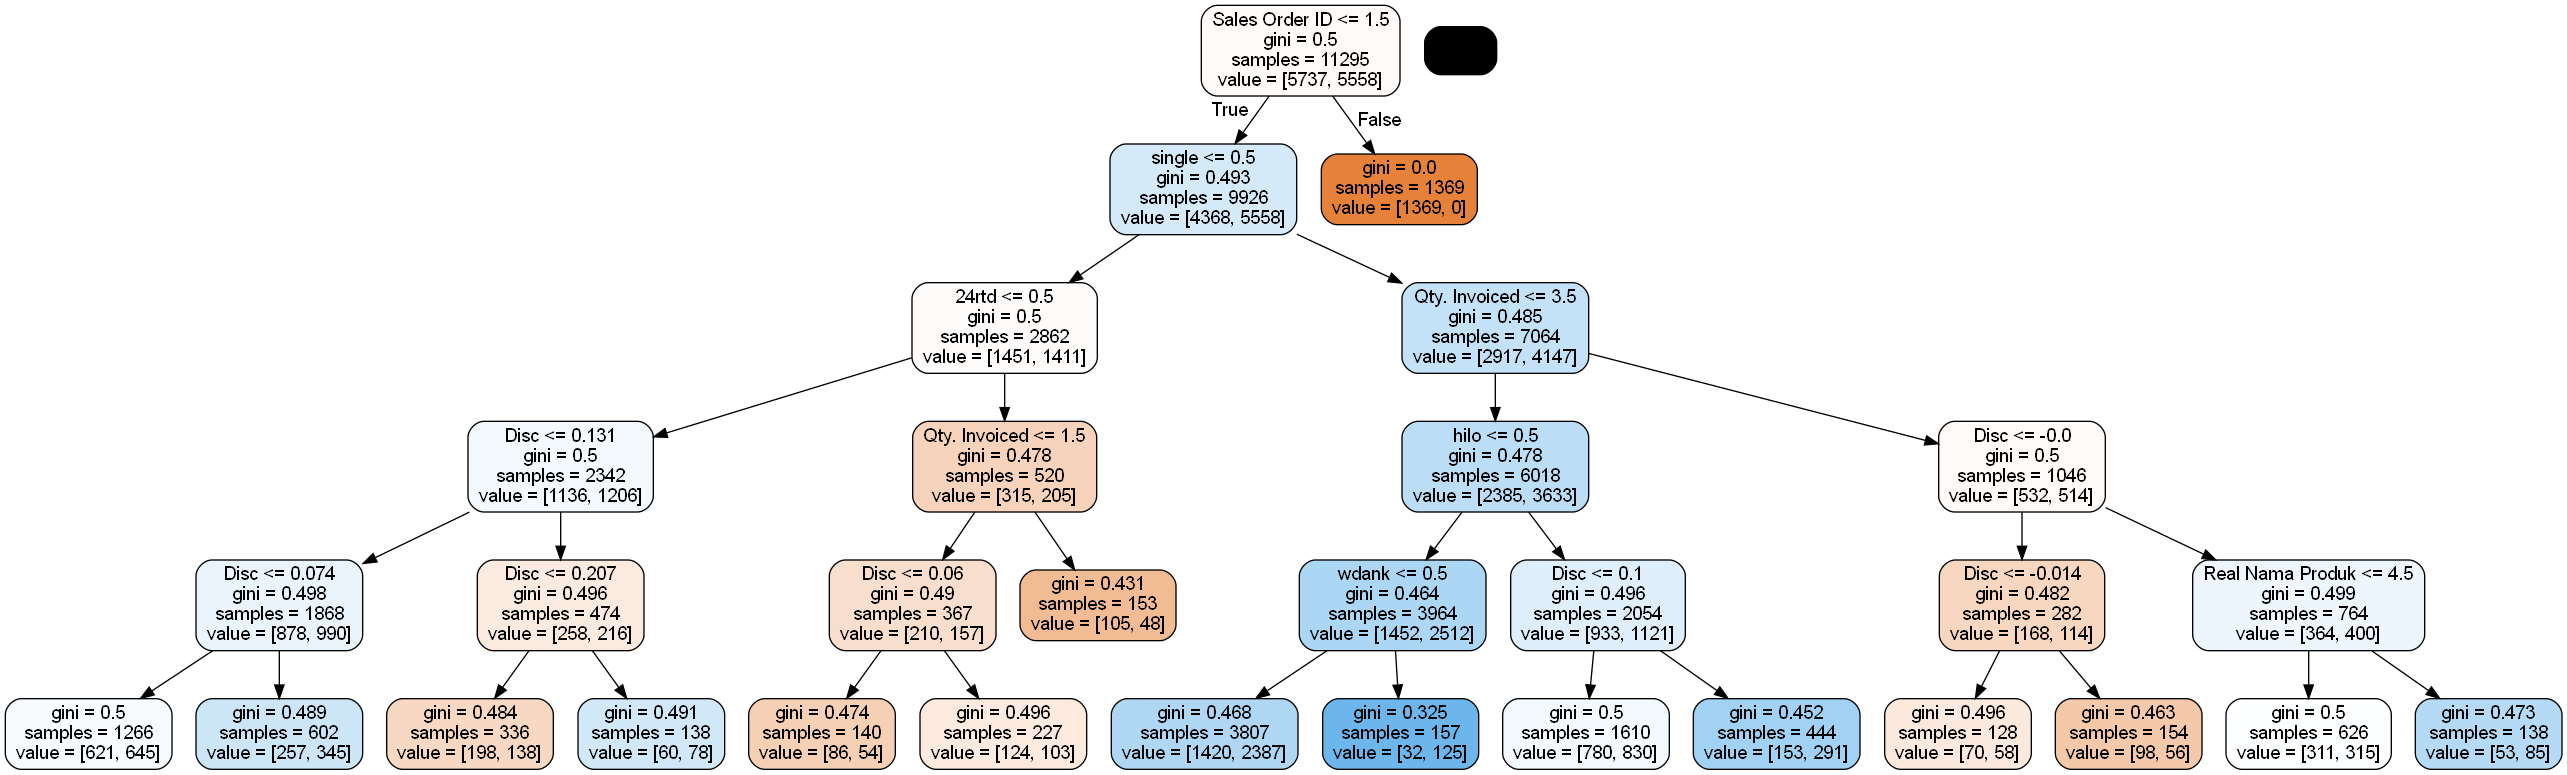

In [91]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth = 5, min_samples_leaf=100)
rfc.fit(X_train, y_train.values.ravel())
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[1369 1605]
 [ 625 2484]]


In [94]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.69      0.46      0.55      2974
           1       0.61      0.80      0.69      3109

    accuracy                           0.63      6083
   macro avg       0.65      0.63      0.62      6083
weighted avg       0.65      0.63      0.62      6083



In [95]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(learning_rate = 0.01).fit(X_train, y_train.values.ravel())
clf.score(X_test, y_test)

0.632089429557784